# Capstone Project - GTSRB - Alman Trafik İşareti Tanıma

<img src='11.jpg'>

<hd>**Öncelikle, Kaggle'daki Alman Trafik İşareti veri kümesini inceleyeceğiz.Sonra, gerekirse boyut değiştirme ve normalizasyon gibi ön işleme adımları uygulayacağız.Ardından, evrişimli sinir ağı (CNN) modeli seçecek ve eğitmek için veriyi eğitim ve doğrulama kümelerine ayıracağız.Daha sonra, modeli doğrulama verileri ile değerlendirecek ve doğruluk, kesinlik gibi metrikleri hesaplayacağız.Sonrasında, modeli entegre ederek kullanıcı dostu bir web sitesi veya mobil uygulama tasarlayacağız.**
</hd>

In [1]:
import numpy as np
import pandas as pd 

import os # Python'da işletim sistemi ile etkileşim kurmak için os modülünü içe aktarır.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
#/kaggle/input dizinini yürüyerek, bu dizindeki tüm alt dizinleri ve dosyaları keşfeder. os.walk, üç değer döndürür:
#dirname: Geçerli dizinin yolunu temsil eder.
#_: Geçerli dizindeki alt dizinlerin bir listesini temsil eder (bu örnekte kullanılmadığı için _ ile adlandırılmıştır).
#filenames: Geçerli dizindeki dosyaların bir listesini temsil eder.

# filenames listesindeki her bir dosya adı için döngü başlatır. Her döngüde, filename değişkeni geçerli dosya adını alır.
# dirname ve filename kullanarak, geçerli dizin ve dosya adını birleştirir. Bu, tam dosya yolunu oluşturur (örneğin, /kaggle/input/dosya.txt gibi).



/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [2]:
import numpy as np     # NumPy, sayısal verilerle çalışmak için kullanılan bir kütüphanedir ve diziler, matrisler gibi veri yapıları sağlar.
import pandas as pd     # Pandas, veri analizi ve manipülasyonu için kullanılan bir kütüphanedir ve özellikle DataFrame veri yapısını sağlar.
import os             #  İşletim sistemi ile etkileşim kurmak için os modülünü içe aktarır. Dosya ve dizin işlemleri için fonksiyonlar sağlar.
import seaborn as sns    # Seaborn, istatistiksel veri görselleştirmeleri oluşturmak için kullanılır ve Matplotlib üzerine inşa edilmiştir.
import matplotlib.pyplot as plt   # Matplotlib kütüphanesinin pyplot modülünü içe aktarır. Veri görselleştirmeleri için kullanılacak fonksiyonları sağlar.
import random    # astgele sayı ve seçim işlemleri için random modülünü içe aktarır. Rastgele sayılar oluşturmak ve liste elemanlarını rastgele seçmek için kullanılır.

from PIL import Image   # Görüntü dosyalarını açmak, işlemek ve kaydetmek için kullanılır.Görüntü dosyalarını açmak, işlemek ve kaydetmek için kullanılır.
from skimage import io    # Scikit-image kütüphanesinin io modülünü içe aktarır. Görüntü okuma ve yazma işlemleri için kullanılır.

import torch     # PyTorch kütüphanesini içe aktarır. Derin öğrenme ve makine öğrenimi uygulamaları için kullanılan bir kütüphanedir.
import torch.nn as nn    # PyTorch'un sinir ağı modülünü içe aktarır. Sinir ağı katmanları ve yapı taşları için kullanılır.
import torch.nn.functional as F    # PyTorch'un işlevsel API'sini içe aktarır. Aktivasyon fonksiyonları gibi sinir ağı işlevlerini içerir.
from torch.utils.data import DataLoader, random_split, Dataset   # PyTorch'un veri işleme araçlarını içe aktarır: DataLoader: Veri kümesini yüklemek ve döngülerde kullanmak için. random_split: Veri kümesini rastgele parçalara ayırmak için. Dataset: Veri kümesi oluşturmak için temel sınıf.
import torch.optim as optim   # PyTorch'un optimizasyon algoritmalarını içe aktarır. Model eğitimi sırasında ağırlıkları güncellemek için kullanılır.

import torchvision.datasets   #  Görüntü verisi setlerini içe aktarır. Öntanımlı veri setlerini (örneğin, MNIST, CIFAR-10) kullanmak için.
import torchvision.transforms as T    # Görüntü dönüşümleri için kullanılan modülü içe aktarır. Görüntüleri ölçeklendirme, döndürme gibi işlemler için kullanılır.
from torchvision.io import read_image    # Görüntü dosyalarını okumak için kullanılan fonksiyonu içe aktarır.
from torchvision.datasets import DatasetFolder    # Klasör yapısındaki veri setlerini yüklemek için kullanılan sınıfı içe aktarır.
from torchvision.datasets.folder import default_loader   # Varsayılan yükleyici fonksiyonunu içe aktarır. Görüntü dosyalarını yüklemek için kullanılır.

In [3]:
meta_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv') # Meta.csv dosyasını okur ve bir DataFrame (veri çerçevesi) olarak meta_df değişkenine atar. Bu dosya, genellikle veri setinin meta bilgilerini içerir.
train_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv') # Train.csv dosyasını okur ve bir DataFrame olarak train_df değişkenine atar. Bu dosya, eğitim verilerini içerir ve modelin eğitilmesi için kullanılır.
test_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv') # Test.csv dosyasını okur ve bir DataFrame olarak test_df değişkenine atar. Bu dosya, test verilerini içerir ve modelin performansını değerlendirmek için kullanılır.

In [8]:
meta_df.head()

Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22

In [9]:
train_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [10]:
test_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [11]:
train_df = train_df.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis = 1)
train_df.head()

ClassId                            Path
0       20  Train/20/00020_00000_00000.png
1       20  Train/20/00020_00000_00001.png
2       20  Train/20/00020_00000_00002.png
3       20  Train/20/00020_00000_00003.png
4       20  Train/20/00020_00000_00004.png

In [12]:

from tensorflow.keras.models import Sequential   #Sequential: Keras'ın ardışık modelini içe aktarır. Bu, katmanların sıralı bir şekilde eklenerek oluşturulduğu basit bir model yapısıdır.

from tensorflow.keras.layers import Dense,Conv2D,InputLayer,Reshape,MaxPooling2D,Flatten


#Tam bağlantılı (fully connected) katmanları temsil eder. Her bir girdi, katmandaki tüm nöronlarla bağlantılıdır.
#Conv2D: 2D konvolüsyon katmanını temsil eder. Görüntü verileri üzerinde filtre uygulamak için kullanılır ve derin öğrenme modellerinde yaygın olarak kullanılır.
#InputLayer: Modelin giriş katmanını tanımlamak için kullanılır. Giriş şekli bu katmanda belirlenir.
#Reshape: Girdi verisinin boyutlarını yeniden şekillendirmek için kullanılır.  Resmi diziye çevir.
#MaxPooling2D: 2D maksimum havuzlama katmanı. Görüntü boyutunu azaltarak hesaplama yükünü azaltır ve önemli özellikleri korur.  En büyük rakamı buluyor.
#Flatten: Çok boyutlu veriyi tek boyutlu bir diziye dönüştürür. Genellikle konvolüsyon katmanlarının ardından kullanılır, böylece tam bağlantılı katmanlarla çalışabilir hale gelir. Bütün sütunları tek bir satır yapıyor.


In [13]:
pip install cvlib  #cvlib, görüntü işleme ve bilgisayarla görme uygulamaları için basit bir API sunar.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 74.4 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=ddf84c53d6e7055be813daeea9773ade265607bfeeb94a071adeb7c4433d8f6b
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=0dc6e4eba3c46191772d731b1c92b00175243624192f24c67fcb7b84cefe92bb
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install python-opencv #Python için OpenCV kütüphanesini yüklemek için kullanılır. OpenCV, bilgisayarla görme ve görüntü işleme uygulamaları için yaygın olarak kullanılan bir kütüphanedir.

ERROR: Could not find a version that satisfies the requirement python-opencv (from versions: none)
ERROR: No matching distribution found for python-opencv
Note: you may need to restart the kernel to use updated packages.


In [15]:

import cv2    #Bu kütüphane, görüntü ve video işleme için çok sayıda fonksiyon ve araç sağlar.
import cvlib    #Bu kütüphane, nesne algılama ve görüntü işleme işlemleri için basit bir API sunar.
from cvlib.object_detection import draw_bbox  #cvlib içindeki nesne algılama modülünden draw_bbox fonksiyonunu içe aktarır. Bu fonksiyon, algılanan nesnelerin etrafına dikdörtgen kutular çizmeye yarar.

#OpenCV, temel görüntü işleme işlevlerini sağlarken, cvlib nesne algılama işlemleri için kullanılacaktır. Matplotlib ise görselleştirme amacıyla kullanılacaktır.

In [16]:
pip install pycaret  # PyCaret, makine öğrenimi ve veri analizi süreçlerini kolaylaştıran bir otomasyon kütüphanesidir.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 62.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 84.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf   #TensorFlow kütüphanesini içe aktarır. Derin öğrenme modelleri oluşturmak için yaygın olarak kullanılır.
from tensorflow.keras.utils import to_categorical   # Keras'ın to_categorical fonksiyonunu içe aktarır. Sınıf etiketlerini one-hot kodlamaya dönüştürmek için kullanılır.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout  # Dropout: Aşırı öğrenmeyi önlemek için belirli nöronları rastgele devre dışı bırakır.
from keras.models import load_model  #Keras'tan eğitilmiş bir modeli yüklemek için kullanılan fonksiyonu içe aktarır. Daha önce eğitilmiş bir modelin kaydedildiği dosyadan geri yüklenmesini sağlar. Bu, modelin eğitim sürecini tekrar yapmadan, kaydedilmiş ağırlıkları ve yapılandırmayı kullanarak doğrudan tahminler yapabilmene olanak tanır.


# load_model: Eğitim süreci tamamlandıktan sonra, modeli kaydedip daha sonra tekrar yükleyerek tahminler yapmanı sağlar.

In [18]:
imgs_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"  #imgs_path: Eğitim verilerinin bulunduğu dizinin yolunu tanımlar. Bu dizin, Almanya'daki trafik işaretlerinin görüntülerini içermektedir.
data = []  #data: Görüntü verilerini saklamak için boş bir liste oluşturur.
labels = [] #labels: Her bir görüntüye karşılık gelen etiketleri saklamak için başka bir boş liste oluşturur.
CLASSES = 43 #CLASSES: Toplamda 43 farklı trafik işareti sınıfı olduğunu belirtir. Bu, etiketlerin 0'dan 42'ye kadar olacağını gösterir.

for i in range(CLASSES):  #0'dan 42'ye kadar döngü oluşturur. Her döngü, farklı bir trafik işareti sınıfını temsil eder.
    img_path = os.path.join(imgs_path, str(i)) #0-42 #img_path: Her sınıfa ait görüntülerin bulunduğu dizinin tam yolunu oluşturur. Örneğin, imgs_path/0, imgs_path/1, vb. şeklinde olur.
    for img in os.listdir(img_path):  # Belirtilen img_path dizinindeki tüm dosyaları (görüntüleri) döngüye alır.
        im = Image.open(imgs_path + '/' + str(i) + '/' + img) #Her bir görüntü dosyasını açar. Dizin yolunu birleştirerek doğru dosya yolunu oluşturur.
        im = im.resize((30,30))  # Açılan görüntüyü 30x30 piksel boyutuna yeniden boyutlandırır. Bu, modelin giriş boyutuyla uyum sağlamak için gereklidir.
        im = np.array(im) #Yeniden boyutlandırılmış görüntüyü bir NumPy dizisine dönüştürür. Bu, görüntüleri sayısal olarak işlemek için gereklidir.
        data.append(im)  #Görüntü dizisini data listesine ekler.
        labels.append(i)  # Görüntünün ait olduğu sınıfın etiketini labels listesine ekler. i, o anki sınıf numarasını temsil eder.
data = np.array(data) #Tüm görüntüleri içeren data listesini bir NumPy dizisine dönüştürür. Bu, daha sonra modelde kullanılmak üzere verilerin işlenmesini kolaylaştırır.
labels = np.array(labels)  #Tüm etiketleri içeren labels listesini bir NumPy dizisine dönüştürür.
print("data[0]: ",data[0])  #İlk görüntü dizisini ekrana yazdırır. Bu, ilk görüntünün nasıl göründüğünü kontrol etmek için kullanılır.
print("labels[0:] ",labels[0])  #İlk görüntünün etiketini ekrana yazdırır. Bu, ilk görüntünün hangi sınıfa ait olduğunu gösterir.



#Bu kod, trafik işaretleri görüntülerini yükler, boyutlarını değiştirir ve uygun etiketlerle birlikte bir NumPy dizisine ekler. Bu işlem, daha sonra makine öğrenimi veya derin öğrenme modelleri için eğitim verisi hazırlamak için kullanılır.

data[0]:  [[[255 253 214]
  [255 253 215]
  [255 251 216]
  ...
  [239 222 186]
  [236 220 185]
  [235 217 183]]

 [[255 255 230]
  [255 255 229]
  [255 255 230]
  ...
  [254 241 204]
  [254 240 202]
  [253 239 202]]

 [[255 255 240]
  [255 255 237]
  [255 255 234]
  ...
  [255 247 206]
  [254 246 207]
  [254 244 208]]

 ...

 [[255 255 229]
  [255 255 226]
  [255 255 222]
  ...
  [182 170 140]
  [180 167 137]
  [179 166 137]]

 [[255 255 229]
  [255 255 224]
  [255 255 222]
  ...
  [195 182 151]
  [191 180 149]
  [191 179 147]]

 [[255 255 227]
  [255 255 226]
  [255 255 224]
  ...
  [203 191 157]
  [201 190 157]
  [201 187 155]]]
labels[0: ] 0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42) # train_test_split: data ve labels dizilerini eğitim (train) ve test (test) setlerine ayırır. data: Görüntü verileri. labels: Görüntü etiketleri. test_size=0.2: Verilerin %20'sini test seti olarak ayırır. Geri kalan %80'i eğitim setidir. random_state=42: Rastgele sayı üretecinin durumunu belirler. Bu, her çalıştırmada aynı sonuçları almak için kullanılır.
print("training shape: ",x_train.shape, y_train.shape) # Eğitim setinin (görüntüler ve etiketler) boyutunu ekrana yazdırır. x_train.shape: Eğitim görüntülerinin boyutu. y_train.shape: Eğitim etiketlerinin boyutu.
print("testing shape: ",x_test.shape, y_test.shape)  # Test setinin (görüntüler ve etiketler) boyutunu ekrana yazdırır. x_test.shape: Test görüntülerinin boyutu. y_test.shape: Test etiketlerinin boyutu.

y_train = to_categorical(y_train, 43) #  y_train ve y_test etiketlerini one-hot kodlamaya dönüştürür. y_train: Eğitim etiketleri, artık her etiketin bir dizi içinde temsil edildiği one-hot formatına dönüştürülmüştür. 43: Toplam sınıf sayısını belirtir. Bu, her bir etiketin 43 boyutlu bir diziye dönüştürülmesini sağlar.
y_test = to_categorical(y_test, 43)

print(y_train[1]) # One-hot kodlamasına dönüştürülmüş y_train dizisinin ikinci elemanını ekrana yazdırır. Bu, ikinci eğitim görüntüsünün etiketinin one-hot formatındaki temsilini gösterir.

# Bu kod, görüntü verilerini eğitim ve test setlerine ayırır, ardından etiketleri one-hot kodlamasına dönüştürerek modelin daha etkili bir şekilde öğrenmesini sağlar. Eğitim ve test setlerinin boyutları ekrana yazdırılır ve ikinci eğitim etiketinin one-hot temsilini gösterir.
# One-hot kodlama, kategorik verileri sayısal verilere dönüştürerek makine öğrenimi modellerinin verileri daha etkili bir şekilde işlemesini sağlar. Her sınıf, bir dizi içinde tek bir "1" ve geri kalan elemanlar için "0" ile temsil edilir. Bu yöntem, modelin sınıflar arasındaki ilişkileri anlamasına yardımcı olur.

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


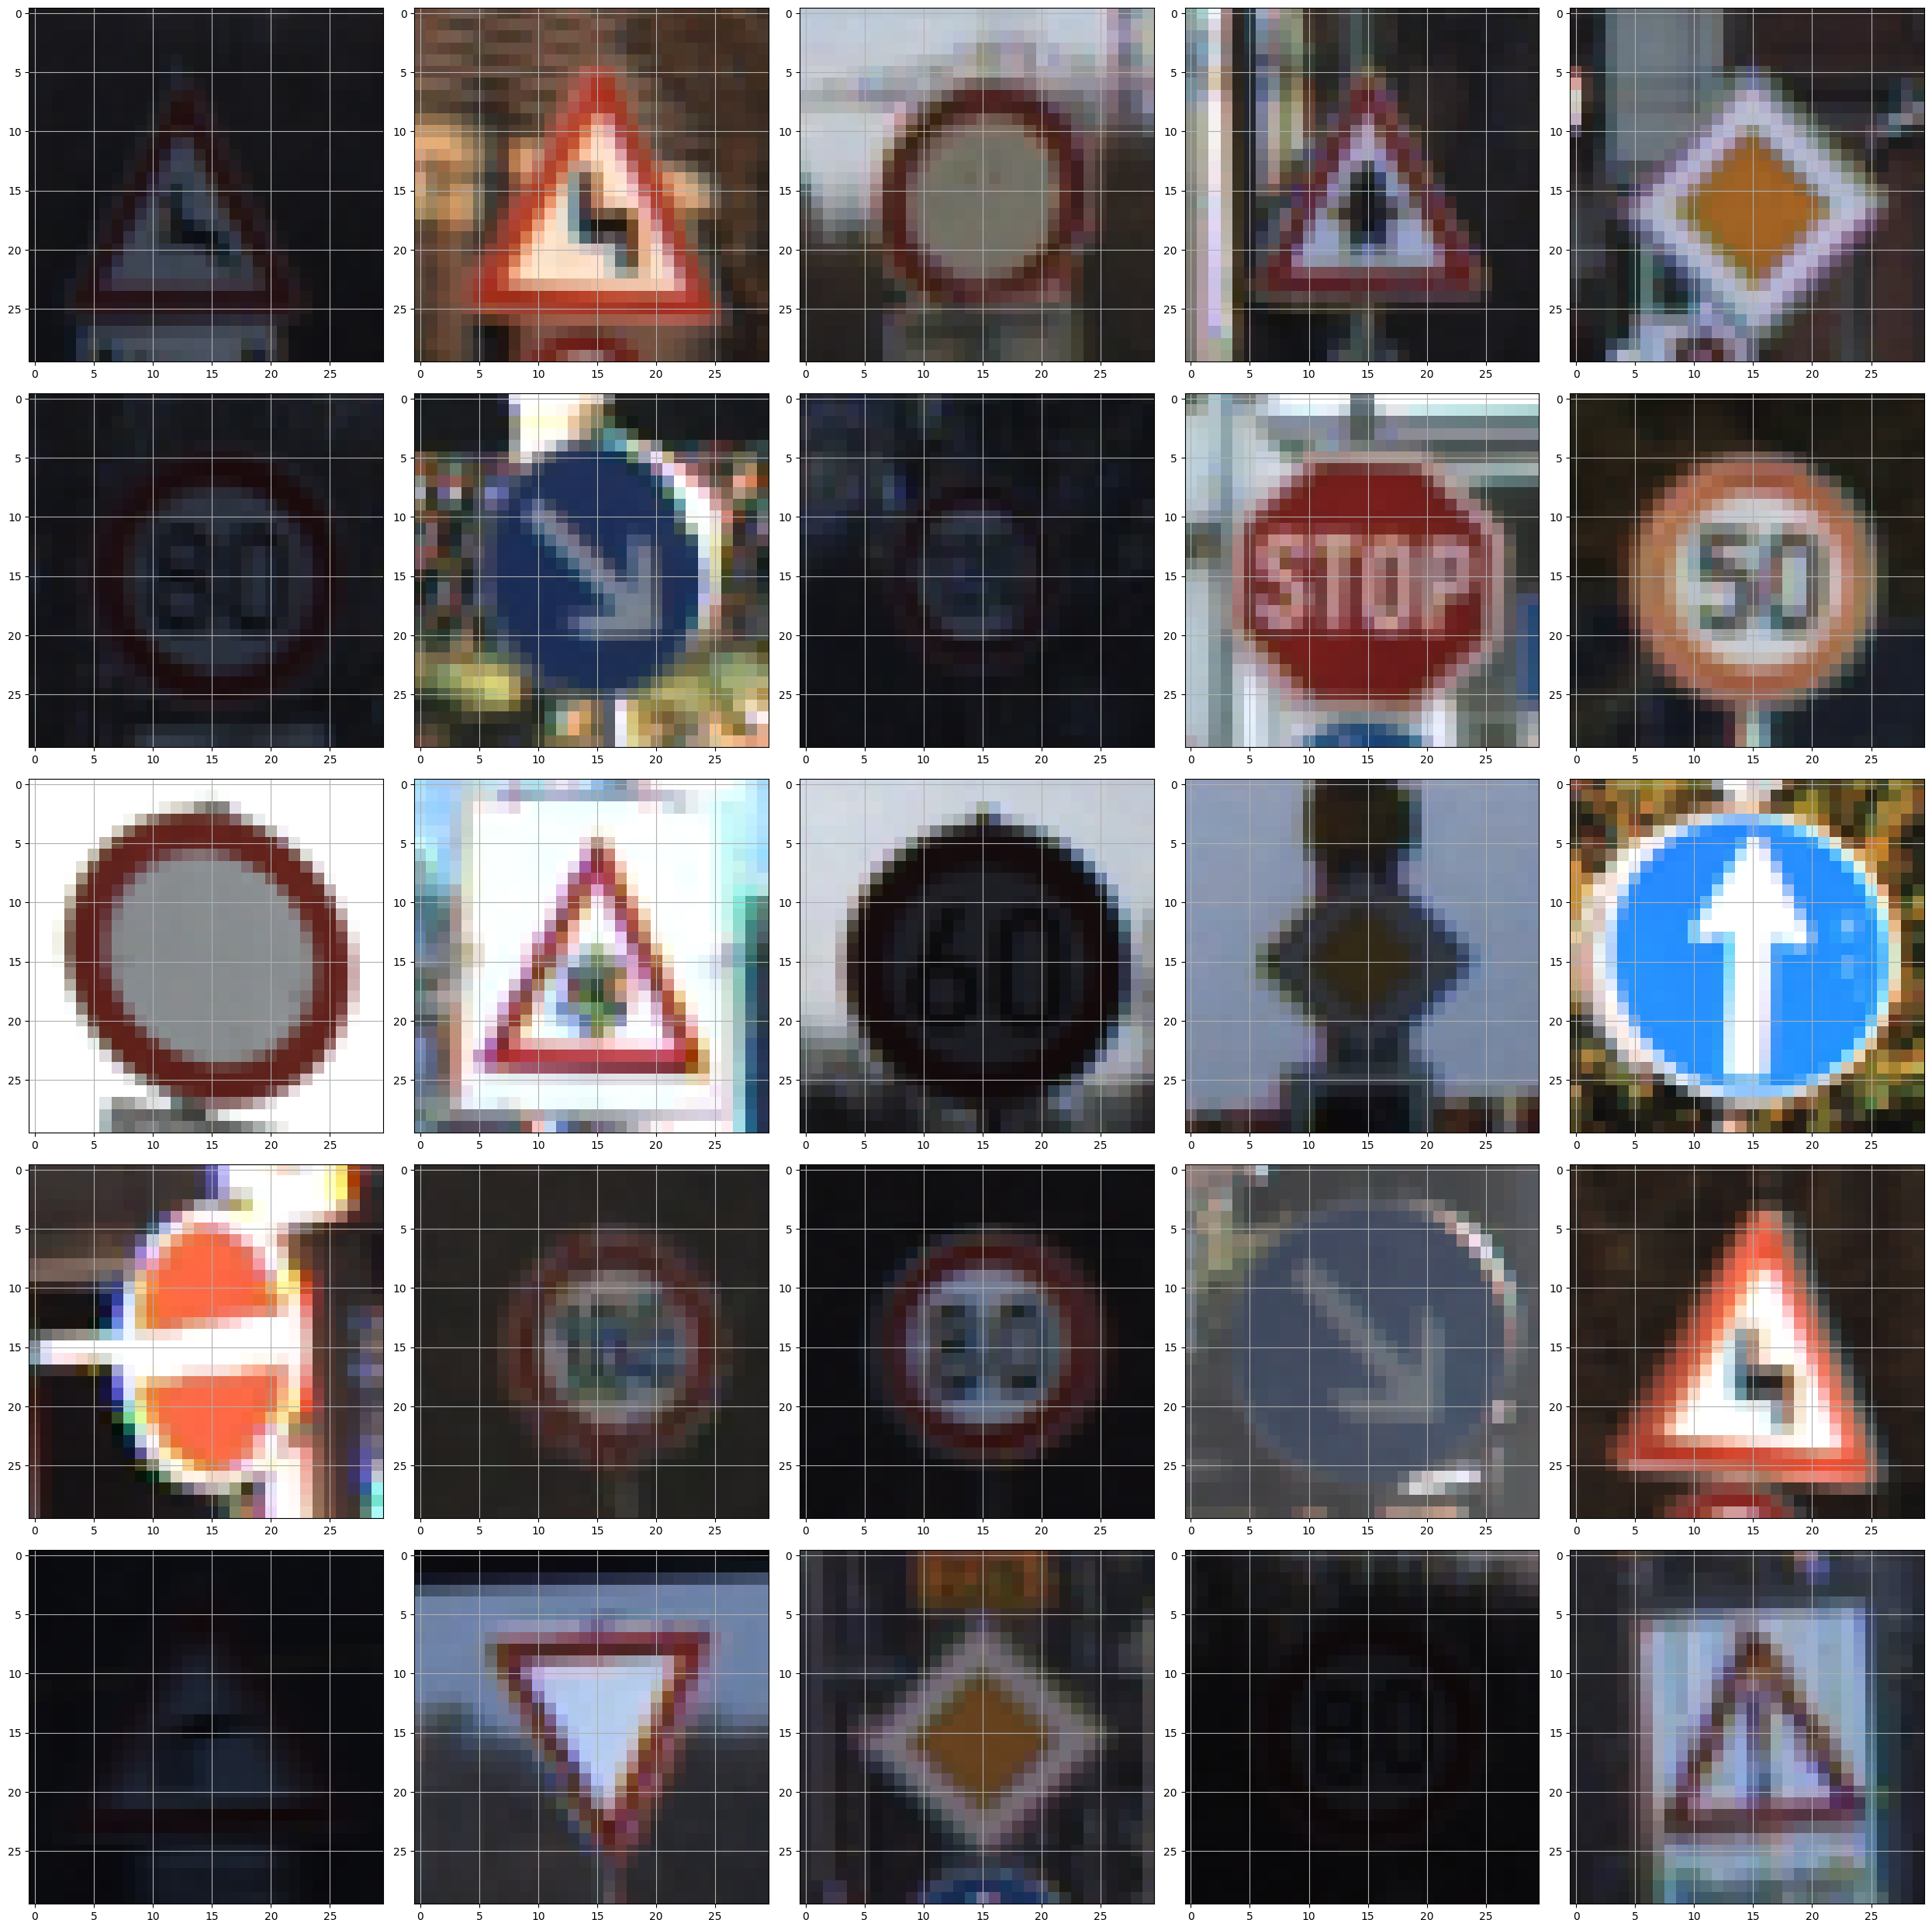

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Eğitim görüntülerinin dizininin yolu
imgs_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
data = []  # Görüntü verilerini saklamak için boş bir liste

# Görüntüleri yükle
for class_id in range(43):
    class_path = os.path.join(imgs_path, str(class_id))
    for img_file in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_file)).resize((30, 30))
        data.append(np.array(img))  # Görüntüyü ekle

data = np.array(data)  # NumPy dizisine dönüştür

# 25 rastgele görüntü göster
plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(data[np.random.randint(len(data))])  # Rastgele görüntü seç
    plt.grid()

plt.tight_layout()
plt.show()

<h1>Keras Modeli Oluşturma</h1>

In [21]:
# Modeli oluştur
model = Sequential()

# İlk konvolüsyon katmanı: 32 filtre, 5x5 çekirdek boyutu, ReLU aktivasyon fonksiyonu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
# input_shape, eğitim verilerinin boyutunu belirtir; bu, modelin ilk katmanı için gereklidir.

# İkinci konvolüsyon katmanı: 32 filtre, 5x5 çekirdek boyutu, ReLU aktivasyon fonksiyonu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))

# Maksimum havuzlama katmanı: 2x2 havuz boyutu
model.add(MaxPool2D(pool_size=(2,2)))
# Bu katman, boyutları azaltarak hesaplama yükünü azaltır ve özelliklerin özetlenmesini sağlar.

# Dropout katmanı: %25 oranında rastgele nöronları devre dışı bırakır
model.add(Dropout(rate=0.25))
# Aşırı öğrenmeyi önlemek için kullanılır.

# Üçüncü konvolüsyon katmanı: 64 filtre, 3x3 çekirdek boyutu, ReLU aktivasyon fonksiyonu
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

# Dördüncü konvolüsyon katmanı: 64 filtre, 3x3 çekirdek boyutu, ReLU aktivasyon fonksiyonu
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

# Maksimum havuzlama katmanı: 2x2 havuz boyutu
model.add(MaxPool2D(pool_size=(2,2)))
# Özelliklerin boyutlarını azaltmaya devam eder.

# Dropout katmanı: %25 oranında rastgele nöronları devre dışı bırakır
model.add(Dropout(rate=0.25))

# Düzleştirme katmanı: Çok boyutlu veriyi tek boyutlu bir diziye dönüştürür
model.add(Flatten())

# Tam bağlantılı katman: 256 nöron, ReLU aktivasyon fonksiyonu
model.add(Dense(256, activation="relu"))

# Dropout katmanı: %50 oranında rastgele nöronları devre dışı bırakır
model.add(Dropout(rate=0.5))

# Çıkış katmanı: 43 nöron (sınıf sayısı), softmax aktivasyon fonksiyonu
model.add(Dense(43, activation="softmax"))
# Bu katman, her bir sınıfın olasılıklarını döndürerek modelin tahmin yapmasını sağlar.


#ReLU: Gizli katmanlarda kullanılır, negatif değerleri sıfıra döndürerek hızlı hesaplama ve daha iyi performans sağlar.
#Softmax: Çıkış katmanında kullanılır ve çok sınıflı sınıflandırma problemlerinde her sınıf için olasılık değerleri üretir.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Bu model, bir konvolüsyonel sinir ağı (CNN) olarak tasarlanmıştır. 
Konvolüsyon katmanları, görüntülerden özellikleri çıkarmak için kullanılırken, havuzlama katmanları boyutları azaltarak daha derin özelliklerin öğrenilmesini sağlar. 
Dropout katmanları, aşırı öğrenmeyi önlemek için rastgele nöronları devre dışı bırakır. Son olarak, çıkış katmanı, modelin sınıflar arasında tahmin yapabilmesi için olasılıkları döndürür.

In [22]:
model.summary() #Keras'ta tanımlanan bir modelin yapısını ve katmanlarını özetleyen bir rapor oluşturur. 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

<h1>Train model</h1>

In [24]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#"categorical_crossentropy": Çok sınıflı sınıflandırma problemlerinde yaygın olarak kullanılan bir kayıp fonksiyonudur. Gerçek etiketlerle modelin tahminleri arasındaki farkı ölçer. Olasılık dağılımı olarak temsil edilen hedef değişkenler için uygundur.
#"adam":  Modelin ağırlıklarını güncellemek için kullanılır. Adam, hızlı ve etkili bir şekilde öğrenme sağlar.
#["accuracy"]: Modelin doğruluğunu ölçmek için kullanılır. Doğru tahminlerin toplam tahminlere oranını ifade eder. Eğitim ve test sırasında modelin ne kadar doğru tahmin yaptığını gösterir.

#model.compile() fonksiyonu, modelin eğitim sürecini yapılandırmak için kritik bir adımdır. Kayıp fonksiyonu, optimizasyon algoritması ve metrikler belirlenerek modelin nasıl öğrenileceği ve performansının nasıl değerlendirileceği ayarlanır. Bu yapılandırma, modelin başarısını doğrudan etkiler.

In [25]:
epochs = 15 # Eğitim sürecinde modelin verileri kaç kez göreceğini belirtir. Her bir epoch, modelin tüm eğitim verilerini bir kez işlemesi anlamına gelir. Daha fazla epoch, modelin daha fazla öğrenmesine olanak tanır, ancak aşırı öğrenme (overfitting) riskini de artırır.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))


# x_train: Eğitim için kullanılan girdi verileri (görüntüler).
# y_train: Eğitim etiketleri (one-hot kodlanmış).
# epochs=epochs: Yukarıda belirlenen epoch sayısı.
# batch_size=64: Modelin her güncelleme için kaç örneği aynı anda işleyeceğini belirtir. Örneğin, 64 örnek ile model güncellenecek.
# Kullanım: Küçük bir batch size, modelin daha sık güncellenmesini sağlar ama daha fazla hesaplama zamanına neden olabilir. Büyük bir batch size ise daha az güncelleme ile daha hızlı işlem yapar.
# validation_data=(x_test, y_test): Modelin eğitim sırasında test seti üzerinde doğruluğunu ve kaybını izlemek için kullanılır. Eğitim sırasında model, x_test üzerinde y_test ile karşılaştırarak performansını değerlendirir.
# Kullanım: Modelin genel performansını izlemek ve aşırı öğrenme (overfitting) durumunu tespit etmek için önemlidir.

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.2407 - loss: 4.3044 - val_accuracy: 0.8491 - val_loss: 0.6987
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.7223 - loss: 0.9824 - val_accuracy: 0.9188 - val_loss: 0.3257
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.8156 - loss: 0.6286 - val_accuracy: 0.9492 - val_loss: 0.2068
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8602 - loss: 0.4593 - val_accuracy: 0.9510 - val_loss: 0.1820
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8936 - loss: 0.3649 - val_accuracy: 0.9688 - val_loss: 0.1155
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9105 - loss: 0.3010 - val_accuracy: 0.9773 - val_loss: 0.0856
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9235 - loss: 0.2599 - val_accuracy: 0.9725 - val_loss: 0.1018
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9311 - loss: 0.2392 - 

Bu kod, modelin eğitim sürecini başlatır. Belirtilen epoch sayısı kadar eğitim verilerini işler ve her epoch sonunda doğrulama verileri ile modelin performansını değerlendirir. fit fonksiyonu, modelin öğrenme sürecini yönetir ve eğitim sırasında kayıp ve doğruluk gibi metrikleri takip eder. history değişkeni, eğitim süreci boyunca kaydedilen metrikleri içerir ve daha sonra analiz için kullanılabilir.


<h1>Kayıp ve Doğruluk modelini görselleştirme</h1>

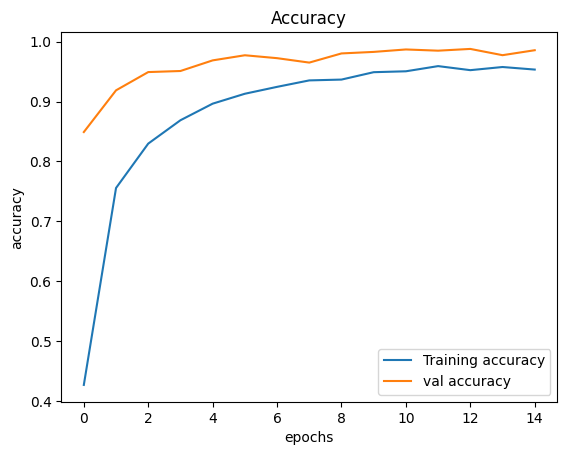

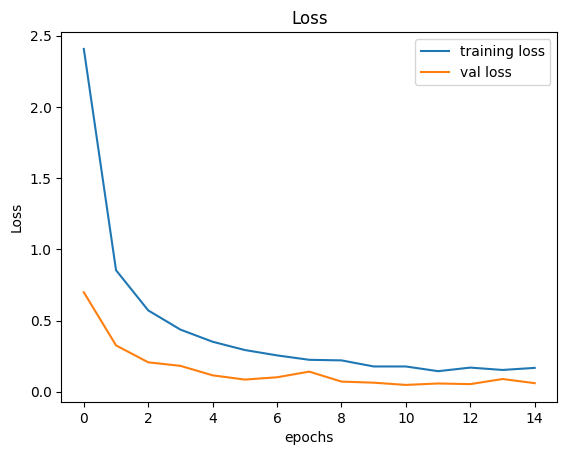

In [27]:
# İlk figür: Underfitting durumu için doğruluk grafiği
plt.figure(0)  # Underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")  # Eğitim doğruluğunu çiz
plt.plot(history.history['val_accuracy'], label="Validation accuracy")  # Doğrulama doğruluğunu çiz
plt.title("Accuracy")  # Başlık
plt.xlabel("Epochs")  # X ekseni etiketi
plt.ylabel("Accuracy")  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.savefig('underfitting.png')  # Grafiği kaydet

# İkinci figür: Overfitting durumu için kayıp grafiği
plt.figure(1)  # Overfitting
plt.plot(history.history['loss'], label="Training loss")  # Eğitim kaybını çiz
plt.plot(history.history['val_loss'], label="Validation loss")  # Doğrulama kaybını çiz
plt.title("Loss")  # Başlık
plt.xlabel("Epochs")  # X ekseni etiketi
plt.ylabel("Loss")  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.savefig('overfitting.png')  # Grafiği kaydet

# Tüm grafikleri göster
plt.show()


<h1>Modeli test etme</h1>

In [29]:
# Test verilerini oku
test = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")

# Test etiketlerini al
test_labels = test['ClassId'].values.tolist()

# Test görüntülerinin dosya yollarını al
test_img_path = "/kaggle/input/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values

# Test verileri için boş bir liste oluştur
test_data = []

# Her bir test görüntüsü için döngü
for img in test_imgs:
    # Görüntüyü aç
    im = Image.open(test_img_path + '/' + img)
    
    # Görüntüyü 30x30 boyutuna yeniden boyutlandır
    im = im.resize((30, 30))
    
    # Görüntüyü NumPy dizisine çevir
    im = np.array(im)
    
    # Görüntüyü test verisi listesine ekle
    test_data.append(im)

# Test verisini NumPy dizisine çevir
test_data = np.array(test_data)

# Modelin test verisi üzerinde tahmin yapmasını sağla
predictions = model.predict(test_data) 

# Tahminlerin en yüksek olasılığa sahip sınıfını al
classes_x = np.argmax(predictions, axis=1).tolist() #Modelin test verisi üzerinde yaptığı tahminlerdir. Genellikle, her bir görüntü için birden fazla sınıfın olasılıklarını içeren bir dizi döndürülür. Örneğin, bir model 10 sınıfı tahmin ediyorsa, her bir görüntü için 10 olasılık değeri olacaktır.

# np.argmax(), belirtilen eksende (bu durumda axis=1) en yüksek değere sahip olan indeksleri döndürür.
# axis=1 kullanılması, her bir satır için (her bir görüntü için) en yüksek olasılığa sahip sınıfın indeksini alır. 
# Örneğin, bir görüntü için tahminler [0.1, 0.7, 0.2] şeklindeyse, argmax bu durumda 1 döndürecektir, çünkü en yüksek olasılık 0.7 ile 2. sınıfa aittir.

#.tolist(): Elde edilen NumPy dizisini bir Python listesine dönüştürür. Bu, daha sonra liste üzerinde işlemler yapmayı kolaylaştırır.

#Bu adım, modelin tahminlerinden en yüksek olasılığa sahip sınıf indekslerini çıkarmak için kullanılır. Tahminlerin en yüksek olasılığa sahip sınıfı belirlenir. Sonuç olarak, classes_x değişkeni, modelin her bir test görüntüsü için tahmin edilen sınıf etiketlerini içerir.

# Doğruluğu hesapla ve yazdır
print("accuracy: ", accuracy_score(test_labels, classes_x))

# Bu ifade, modelin test verisi üzerindeki başarısını değerlendirmek için kullanılır. Doğruluk oranı, modelin ne kadar iyi çalıştığını anlamak için önemli bir metriktir ve kullanıcıya, modelin gerçek dünyada ne kadar etkili olabileceği hakkında bilgi verir.
# accuracy_score: Scikit-learn kütüphanesinin bir fonksiyonudur. Gerçek etiketler ile tahmin edilen etiketler arasındaki doğruluğu hesaplar.
# test_labels: Gerçek test etiketlerini içeren bir liste veya dizi. Bu, modelin tahminleriyle karşılaştırılacak olan doğru sınıflardır.
# classes_x: Modelin tahmin ettiği sınıf etiketlerini içeren bir liste veya dizi. Bu, modelin test verisi üzerindeki tahminlerini temsil eder.
# accuracy_score, doğru tahmin edilen örneklerin sayısını toplam örnek sayısına bölerek doğruluğu hesaplar. Sonuç, genellikle 0 ile 1 arasında bir değerdir; 1, mükemmel bir doğruluğu (tüm tahminlerin doğru olduğunu) ifade ederken, 0, tüm tahminlerin yanlış olduğunu gösterir.

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
accuracy:  0.953840063341251


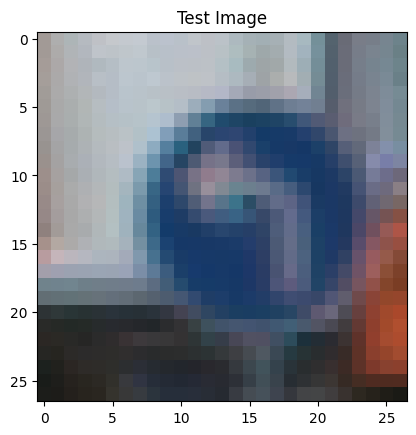

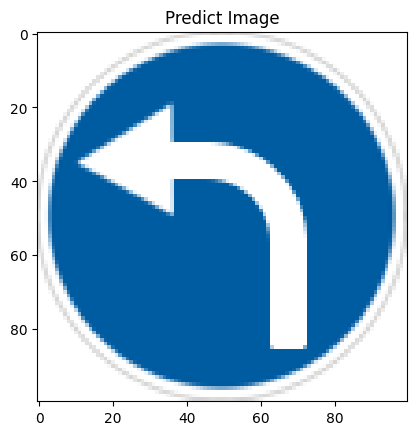

In [36]:
number_of_image_test = 73  # Test edilecek görüntünün indeks numarası

# Test görüntüsünün adını ve etiketini al
test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
#Seçilen görüntünün adını (test_image_name) ve gerçek etiketini (image_label) alır.


# İlk figür: Test görüntüsünü göster
plt.figure(0) # Yeni bir figür oluştur
img_path = test_img_path + '/' + test_image_name  # Görüntü dosyasının tam yolunu oluştur
img = Image.open(img_path)  # Görüntüyü aç
plt.imshow(img)  # Görüntüyü göster
plt.title("Test Image")  # Başlık ekle

# İkinci figür: Tahmin edilen sınıfın görselini göster
plt.figure(1)
img_pre = Image.open('/kaggle/input/gtsrb-german-traffic-sign/Meta/' + str(classes_x[number_of_image_test]) + '.png')  # Tahmin edilen sınıfın görselini aç
plt.imshow(img_pre)  # Görseli göster
plt.title("Predict Image")  # Başlık ekle

# Tüm grafikleri göster
plt.show()

Bu kod, belirli bir test görüntüsünü ve modelin tahmin ettiği sınıfın görselini yan yana gösterir. Bu, modelin performansını değerlendirmek için görsel bir araç sağlar. Kullanıcı, modelin tahmininin ne kadar doğru olduğunu görmek için gerçek görüntü ile tahmin edilen simgeyi karşılaştırabilir.

<hd>**Modelimiz, test verileri üzerinde %95 oranında bir başarı göstererek etkili bir trafik işareti tanıma sistemi oluşturmuştur.**</hd>